In [1]:
import pandas as pd
import datetime
import random
import os
import sys

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from ISS.trades import Trades

In [3]:
securityids = ['MOEX', 'SBER', 'AFKS', 'SU25081RMFS9']
dt = datetime.date(2017, 9, 11)

We can load trades for full market

In [4]:
%%time
T = Trades(engine='stock', market='shares')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: None, securityid: None
------------------------------------------------------------------
------------------------------------------------------------------
Trades (458540 trades, 254 securityids, time: 2017-09-15 18:50:00)
engine: stock, market: shares, boardid: None, securityid: None
------------------------------------------------------------------
CPU times: user 7.16 s, sys: 380 ms, total: 7.54 s
Wall time: 2min 6s


In [5]:
T.trades.head()

,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals
0,2748066209,09:59:31,TQBR,BANE,1979.0,1,1979.0,S,959,2017-09-15 09:59:31,S,0
1,2748066210,09:59:31,TQBR,BANE,1979.0,4,7916.0,S,959,2017-09-15 09:59:31,S,0
2,2748066211,09:59:31,TQBR,BANE,1979.0,3,5937.0,S,959,2017-09-15 09:59:31,B,0
3,2748066212,09:59:31,TQBR,BANE,1979.0,1,1979.0,S,959,2017-09-15 09:59:31,S,0
4,2748066213,09:59:31,TQBR,BANE,1979.0,3,5937.0,S,959,2017-09-15 09:59:31,B,0


Or we can load trades for specific securityid

In [6]:
%%time
T = Trades(engine='stock', market='shares', securityid='LKOH')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: None, securityid: LKOH
------------------------------------------------------------------
------------------------------------------------------------------
Trades (22450 trades, 1 securityids, time: 2017-09-15 18:49:54)
engine: stock, market: shares, boardid: None, securityid: LKOH
------------------------------------------------------------------
CPU times: user 404 ms, sys: 20 ms, total: 424 ms
Wall time: 5.9 s


In [8]:
T.trades.head()

,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals
0,2748066337,09:59:41,TQBR,LKOH,2966.0,1,2966.0,S,959,2017-09-15 09:59:41,S,1
1,2748066338,09:59:41,TQBR,LKOH,2966.0,5,14830.0,S,959,2017-09-15 09:59:41,S,1
2,2748066339,09:59:41,TQBR,LKOH,2966.0,46,136436.0,S,959,2017-09-15 09:59:41,B,1
3,2748066340,09:59:41,TQBR,LKOH,2966.0,1,2966.0,S,959,2017-09-15 09:59:41,S,1
4,2748066341,09:59:41,TQBR,LKOH,2966.0,1,2966.0,S,959,2017-09-15 09:59:41,B,1


We even can specify boardid, but separatedly (without securityid)

In [9]:
%%time
T = Trades(engine='stock', market='shares', boardid='TQBR')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: TQBR, securityid: None
------------------------------------------------------------------
------------------------------------------------------------------
Trades (449046 trades, 227 securityids, time: 2017-09-15 18:50:00)
engine: stock, market: shares, boardid: TQBR, securityid: None
------------------------------------------------------------------
CPU times: user 7.06 s, sys: 364 ms, total: 7.43 s
Wall time: 2min 3s


In [10]:
T.trades.head()

,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals
0,2748066209,09:59:31,TQBR,BANE,1979.0,1,1979.0,S,959,2017-09-15 09:59:31,S,0
1,2748066210,09:59:31,TQBR,BANE,1979.0,4,7916.0,S,959,2017-09-15 09:59:31,S,0
2,2748066211,09:59:31,TQBR,BANE,1979.0,3,5937.0,S,959,2017-09-15 09:59:31,B,0
3,2748066212,09:59:31,TQBR,BANE,1979.0,1,1979.0,S,959,2017-09-15 09:59:31,S,0
4,2748066213,09:59:31,TQBR,BANE,1979.0,3,5937.0,S,959,2017-09-15 09:59:31,B,0


We can make a plots

In [11]:
import matplotlib.pyplot as plt
from ISS.plots import tradesplot

In [14]:
%%time
T = Trades(engine='stock', market='shares', securityid='MOEX')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: None, securityid: MOEX
------------------------------------------------------------------
------------------------------------------------------------------
Trades (22315 trades, 1 securityids, time: 2017-09-15 18:48:10)
engine: stock, market: shares, boardid: None, securityid: MOEX
------------------------------------------------------------------
CPU times: user 360 ms, sys: 24 ms, total: 384 ms
Wall time: 6.1 s


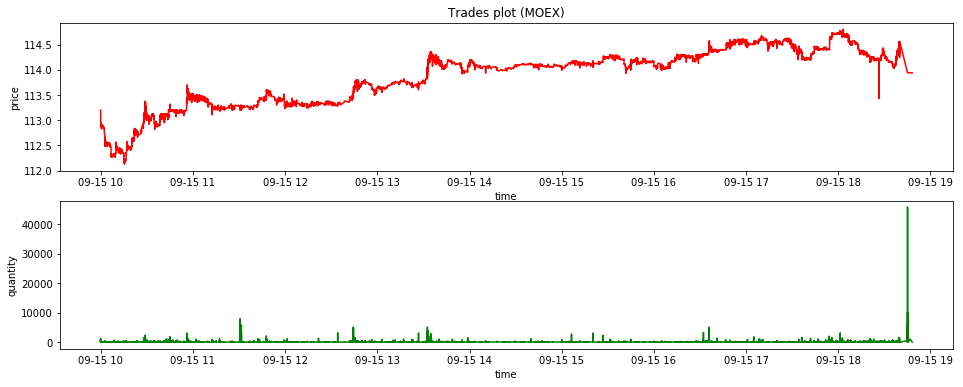

In [15]:
fig, [ax1, ax2] = tradesplot(T.trades, T.securityid)
plt.show()

In [16]:
t = T.trades
t.head()

,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals
0,2748066668,09:59:54,TQBR,MOEX,113.2,2,2264.0,S,959,2017-09-15 09:59:54,B,2
1,2748066669,09:59:54,TQBR,MOEX,113.2,5,5660.0,S,959,2017-09-15 09:59:54,B,2
2,2748066670,09:59:54,TQBR,MOEX,113.2,20,22640.0,S,959,2017-09-15 09:59:54,B,2
3,2748066671,09:59:54,TQBR,MOEX,113.2,80,90560.0,S,959,2017-09-15 09:59:54,S,2
4,2748066672,09:59:54,TQBR,MOEX,113.2,19,21508.0,S,959,2017-09-15 09:59:54,B,2


In [18]:
(t['price']*t['quantity']).sum()/t['quantity'].sum(), t['price'].median(), t['price'].mean()

(113.89397867498549, 114.08, 113.84186466502993)

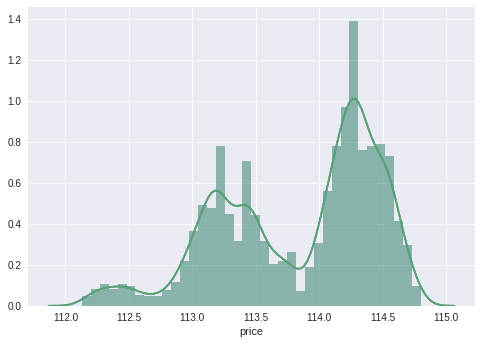

In [20]:
import seaborn as sns
sns.distplot(t['price'])
plt.show()

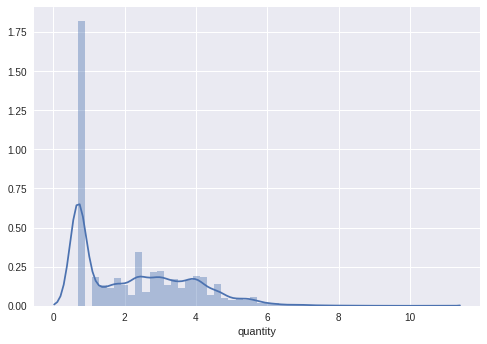

In [24]:
import numpy as np
sns.distplot(np.log1p(t['quantity']))
plt.show()